## Connect with the GoogleDrive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Import all the modules

In [ ]:
import os
import glob
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import json
import tensorflow.keras as keras
import tensorflow.keras.optimizers as optimizers
from sklearn.utils import shuffle

# Load training HW data and assign labels for each data sample (`[1]`)

In [ ]:
#folder_path = '/content/drive/MyDrive/project/Training_MS_dB/HW'
folder_path = '/content/drive/MyDrive/project/Training_MS_PCEN/HW'
#folder_path = '/content/drive/MyDrive/project/Training_MS_PCEN_default/HW'

png_files = glob.glob(os.path.join(folder_path, '*.png'))

images_as_arrays = []
count = 1
for file in png_files:
    with Image.open(file) as img:
        img_array = np.array(img)
        print(f"The data sample {file} is processed: {count}/{len(os.listdir(folder_path))}")
        count = count+1
        images_as_arrays.append(img_array)

training_images_HW = np.asarray(images_as_arrays)
training_labels_HW = np.ones(training_images_HW.shape[0])

The data sample /content/drive/MyDrive/project/Training_MS_PCEN/HW/53B5710D_90.png is processed: 1/355
The data sample /content/drive/MyDrive/project/Training_MS_PCEN/HW/5394B3CD_0.png is processed: 2/355
The data sample /content/drive/MyDrive/project/Training_MS_PCEN/HW/53FD1612_190.png is processed: 3/355
The data sample /content/drive/MyDrive/project/Training_MS_PCEN/HW/54053057_200.png is processed: 4/355
The data sample /content/drive/MyDrive/project/Training_MS_PCEN/HW/53FD1612_0.png is processed: 5/355
The data sample /content/drive/MyDrive/project/Training_MS_PCEN/HW/53B02082_0.png is processed: 6/355
The data sample /content/drive/MyDrive/project/Training_MS_PCEN/HW/53DD16A9_70.png is processed: 7/355
The data sample /content/drive/MyDrive/project/Training_MS_PCEN/HW/53F45319_90.png is processed: 8/355
The data sample /content/drive/MyDrive/project/Training_MS_PCEN/HW/53D81E01_200.png is processed: 9/355
The data sample /content/drive/MyDrive/project/Training_MS_PCEN/HW/540301

In [ ]:
import gc
gc.collect()
del img_resized, img_array, images_as_arrays
gc.collect()

0

# Load training NoHW data and assign labels for each data sample (`[0]`)

In [ ]:
#folder_path = '/content/drive/MyDrive/project/Training_MS_dB/NoHW'
folder_path = '/content/drive/MyDrive/project/Training_MS_PCEN/NoHW'
#folder_path = '/content/drive/MyDrive/project/Training_MS_PCEN_default/NoHW'


png_files = glob.glob(os.path.join(folder_path, '*.png'))

images_as_arrays = []
count = 1
for file in png_files:
    with Image.open(file) as img:
        img_array = np.array(img)
        print(f"The data sample {file} is processed: {count}/{len(os.listdir(folder_path))}")
        count = count+1
        images_as_arrays.append(img_array)

training_images_NoHW = np.asarray(images_as_arrays)
training_labels_NoHW = np.zeros(training_images_NoHW.shape[0])

The data sample /content/drive/MyDrive/project/Training_MS_PCEN/NoHW/53395659_0.png is processed: 1/310
The data sample /content/drive/MyDrive/project/Training_MS_PCEN/NoHW/52FD5696_130.png is processed: 2/310
The data sample /content/drive/MyDrive/project/Training_MS_PCEN/NoHW/53418225_20.png is processed: 3/310
The data sample /content/drive/MyDrive/project/Training_MS_PCEN/NoHW/53258FD9_200.png is processed: 4/310
The data sample /content/drive/MyDrive/project/Training_MS_PCEN/NoHW/52C613B6_60.png is processed: 5/310
The data sample /content/drive/MyDrive/project/Training_MS_PCEN/NoHW/5342783C_250.png is processed: 6/310
The data sample /content/drive/MyDrive/project/Training_MS_PCEN/NoHW/52BF9F5D_230.png is processed: 7/310
The data sample /content/drive/MyDrive/project/Training_MS_PCEN/NoHW/531E05C5_70.png is processed: 8/310
The data sample /content/drive/MyDrive/project/Training_MS_PCEN/NoHW/52F48C96_180.png is processed: 9/310
The data sample /content/drive/MyDrive/project/Trai

In [ ]:
import gc
gc.collect()
del img_resized, img_array, images_as_arrays
gc.collect()

0

In [ ]:
training_data = np.concatenate((training_images_HW, training_images_NoHW), axis=0)
training_labels = np.concatenate((training_labels_HW, training_labels_NoHW), axis=0)

In [ ]:
training_data, training_labels = shuffle(training_data, training_labels, random_state=42)

In [ ]:
import gc
gc.collect()
del training_images_HW, training_images_NoHW, training_labels_HW, training_labels_NoHW
gc.collect()

0

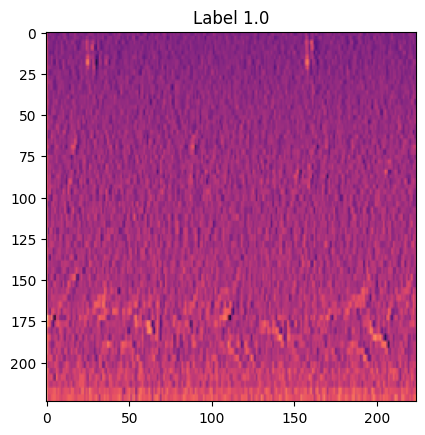

In [ ]:
plt.figure()
plt.imshow(training_data[90])
plt.title(f'Label {training_labels[90]}')
plt.show()

# Load validation HW data and assign labels for each data sample (`[1]`)

In [ ]:
#folder_path = '/content/drive/MyDrive/project/Validation_MS_dB/HW'
folder_path = '/content/drive/MyDrive/project/Validation_MS_PCEN/HW'
#folder_path = '/content/drive/MyDrive/project/Validation_MS_PCEN_default/HW'

png_files = glob.glob(os.path.join(folder_path, '*.png'))

images_as_arrays = []
count = 1
for file in png_files:
    with Image.open(file) as img:
        img_array = np.array(img)
        print(f"The data sample {file} is processed: {count}/{len(os.listdir(folder_path))}")
        count = count+1
        images_as_arrays.append(img_array)

validation_images_HW = np.asarray(images_as_arrays)
validation_labels_HW = np.ones(validation_images_HW.shape[0])

The data sample /content/drive/MyDrive/project/Validation_MS_PCEN/HW/53B64781_100.png is processed: 1/100
The data sample /content/drive/MyDrive/project/Validation_MS_PCEN/HW/53A9FD05_0.png is processed: 2/100
The data sample /content/drive/MyDrive/project/Validation_MS_PCEN/HW/53E94889_160.png is processed: 3/100
The data sample /content/drive/MyDrive/project/Validation_MS_PCEN/HW/53C4C801_0.png is processed: 4/100
The data sample /content/drive/MyDrive/project/Validation_MS_PCEN/HW/53B64781_190.png is processed: 5/100
The data sample /content/drive/MyDrive/project/Validation_MS_PCEN/HW/53E94889_250.png is processed: 6/100
The data sample /content/drive/MyDrive/project/Validation_MS_PCEN/HW/53C821D0_220.png is processed: 7/100
The data sample /content/drive/MyDrive/project/Validation_MS_PCEN/HW/53ED8DE5_150.png is processed: 8/100
The data sample /content/drive/MyDrive/project/Validation_MS_PCEN/HW/53C821D0_50.png is processed: 9/100
The data sample /content/drive/MyDrive/project/Vali

In [ ]:
import gc
gc.collect()
del img_resized, img_array, images_as_arrays
gc.collect()

0

# Load validation NoHW data and assign labels for each data sample (`[0]`)

In [ ]:
#folder_path = '/content/drive/MyDrive/project/Validation_MS_dB/NoHW'
folder_path = '/content/drive/MyDrive/project/Validation_MS_PCEN/NoHW'
#folder_path = '/content/drive/MyDrive/project/Validation_MS_PCEN_default/NoHW'

png_files = glob.glob(os.path.join(folder_path, '*.png'))

images_as_arrays = []
count = 1
for file in png_files:
    with Image.open(file) as img:
        img_array = np.array(img)
        print(f"The data sample {file} is processed: {count}/{len(os.listdir(folder_path))}")
        count = count+1
        images_as_arrays.append(img_array)

validation_images_NoHW = np.asarray(images_as_arrays)
validation_labels_NoHW = np.zeros(validation_images_NoHW.shape[0])

The data sample /content/drive/MyDrive/project/Validation_MS_PCEN/NoHW/52A41D90_100.png is processed: 1/100
The data sample /content/drive/MyDrive/project/Validation_MS_PCEN/NoHW/52A59239_270.png is processed: 2/100
The data sample /content/drive/MyDrive/project/Validation_MS_PCEN/NoHW/52DC21CD_30.png is processed: 3/100
The data sample /content/drive/MyDrive/project/Validation_MS_PCEN/NoHW/529F448D_10.png is processed: 4/100
The data sample /content/drive/MyDrive/project/Validation_MS_PCEN/NoHW/52DA8679_200.png is processed: 5/100
The data sample /content/drive/MyDrive/project/Validation_MS_PCEN/NoHW/530B0EB1_120.png is processed: 6/100
The data sample /content/drive/MyDrive/project/Validation_MS_PCEN/NoHW/52A9CD09_140.png is processed: 7/100
The data sample /content/drive/MyDrive/project/Validation_MS_PCEN/NoHW/52A1068E_100.png is processed: 8/100
The data sample /content/drive/MyDrive/project/Validation_MS_PCEN/NoHW/530C27F1_70.png is processed: 9/100
The data sample /content/drive/

In [ ]:
import gc
gc.collect()
del img_resized, img_array, images_as_arrays
gc.collect()

0

In [ ]:
validation_data = np.concatenate((validation_images_HW, validation_images_NoHW), axis=0)
validation_labels = np.concatenate((validation_labels_HW, validation_labels_NoHW), axis=0)

In [ ]:
validation_data, validation_labels = shuffle(validation_data, validation_labels, random_state=42)

In [ ]:
import gc
gc.collect()
del validation_images_HW, validation_labels_HW, validation_images_NoHW, validation_labels_NoHW
gc.collect()

0

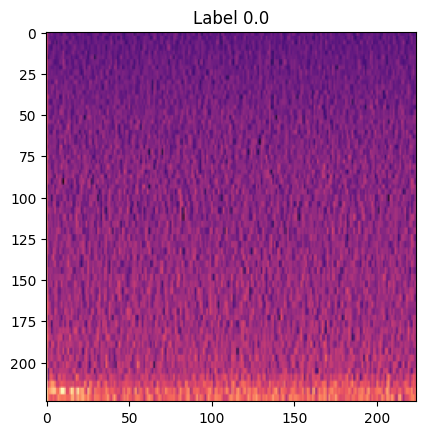

In [ ]:
plt.figure()
plt.imshow(validation_data[8])
plt.title(f'Label {validation_labels[8]}')
plt.show()

## CNN Model

In [ ]:
def model_scratch(input_shape=(64, 559, 3)):

  ########################## CNN model (Functional API)###############################
  ################################ Model Input #######################################
  model_input = keras.Input(shape=input_shape, name='model_input')
  ####################################################################################
  ####################################################################################
  ########################### First 2D Convolutional Layer ###########################
  model_conv_1 = keras.layers.Conv2D(filters= 32,
                                    kernel_size = (3,3),
                                    strides = (2,2),
                                    activation='relu',
                                    padding='valid',
                                    name = 'conv_layer_1'
                                    )(model_input)
  ####################################################################################
  ####################################################################################
  ########################## Second 2D Convolutional Layer ###########################
  model_conv_2 = keras.layers.Conv2D(64,
                                    kernel_size = (3,3),
                                    strides = (2,2),
                                    activation='relu',
                                    padding='valid',
                                    name = 'conv_layer_2'
                                    )(model_conv_1)
  batch_1 = keras.layers.BatchNormalization(name='bn_1')(model_conv_2)
  dropout_1 = keras.layers.Dropout(0.2, name='dropout1')(batch_1)
  ####################################################################################
  ####################################################################################
  ########################## Third 2D Convolutional Layer ############################
  model_conv_3 = keras.layers.Conv2D(128,
                                    kernel_size = (3,3),
                                    strides = (1,1),
                                    activation='relu',
                                    padding='valid',
                                    name = 'conv_layer_3'
                                    )(dropout_1)
  ####################################################################################
  ####################################################################################
  ########################## Fourth 2D Convolutional Layer ###########################
  model_conv_4 = keras.layers.Conv2D(128,
                                    kernel_size = (3,3),
                                    strides = (2,2),
                                    activation='relu',
                                    padding='valid',
                                    name = 'conv_layer_4'
                                    )(model_conv_3)
  batch_2 = keras.layers.BatchNormalization(name='bn_2')(model_conv_4)
  dropout_2 = keras.layers.Dropout(0.3, name='dropout2')(batch_2)
  ####################################################################################
  ####################################################################################
  ########################### Fifth 2D Convolutional Layer ###########################
  model_conv_5 = keras.layers.Conv2D(128,
                                    kernel_size = (3,3),
                                    strides = (1,1),
                                    activation='relu',
                                    padding='valid',
                                    name = 'conv_layer_5'
                                    )(dropout_2)
  ####################################################################################
  ####################################################################################
  ########################### Sixth 2D Convolutional Layer ###########################
  model_conv_6 = keras.layers.Conv2D(64,
                                    kernel_size = (3,3),
                                    strides = (2,2),
                                    activation='relu',
                                    padding='valid',
                                    name = 'conv_layer_6'
                                    )(model_conv_5)
  batch_3 = keras.layers.BatchNormalization(name='bn_3')(model_conv_6)
  ####################################################################################
  ####################################################################################
  ############################## Global Average Pooling ##############################
  gb_lay = keras.layers.GlobalAveragePooling2D(name='glob_av_pool')(batch_3)
  ####################################################################################
  ####################################################################################
  ############################ First Fully Connected Layer ###########################
  FC_1 = keras.layers.Dense(256,
                            activation='relu',
                            use_bias=True,
                            kernel_initializer='glorot_uniform',
                            bias_initializer='zeros',
                            name='FC1')(gb_lay)
  dropout_3 = keras.layers.Dropout(0.5, name='dropout3')(FC_1)
  ####################################################################################
  ####################################################################################
  ########################### Second Fully Connected Layer ###########################
  FC_2 = keras.layers.Dense(128,
                            activation='relu',
                            use_bias=True,
                            kernel_initializer='glorot_uniform',
                            bias_initializer='zeros',
                            name='FC2')(dropout_3)
  dropout_4 = keras.layers.Dropout(0.2, name='dropout4')(FC_2)
  ####################################################################################
  ####################################################################################
  ################################### Output Layer ###################################
  output_layer = keras.layers.Dense(1, activation='sigmoid')(dropout_4)
  ####################################################################################
  ####################################################################################
  ####################################### Model ######################################
  model_scratch = keras.models.Model(inputs=model_input, outputs=output_layer)
  return model_scratch

In [ ]:
model = model_scratch(input_shape=(224, 224, 3))

In [ ]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ model_input (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_layer_1 (Conv2D)                │ (None, 111, 111, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_layer_2 (Conv2D)                │ (None, 55, 55, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bn_1 (BatchNormalization)            │ (None, 55, 55, 64)          │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout1 (Dropout)                   │ (None, 55, 55, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_layer_3 (Conv2D)                │ (None, 53, 53, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_layer_4 (Conv2D)                │ (None, 26, 26, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bn_2 (BatchNormalization)            │ (None, 26, 26, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout2 (Dropout)                   │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_layer_5 (Conv2D)                │ (None, 24, 24, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_layer_6 (Conv2D)                │ (None, 11, 11, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bn_3 (BatchNormalization)            │ (None, 11, 11, 64)          │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ glob_av_pool                         │ (None, 64)                  │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ FC1 (Dense)                          │ (None, 256)                 │          16,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout3 (Dropout)                   │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ FC2 (Dense)                          │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout4 (Dropout)                   │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 512,897 (1.96 MB)

 Trainable params: 512,385 (1.95 MB)

 Non-trainable params: 512 (2.00 KB)

## Compile the Model

In [ ]:
def compiling(model,
              optimizer='adam',
              learning_rate=0.001,
              decaying=True):

    if decaying==True:
        initial_learning_rate = learning_rate
        lr_schedule = optimizers.schedules.ExponentialDecay(initial_learning_rate,
                                                                   decay_steps=90,
                                                                  decay_rate=0.75,
                                                                  staircase=True)

        if optimizer=='adam':
            optimizer = optimizers.Adam(learning_rate=lr_schedule)
        elif optimizer=='adagrad':
            optimizer = optimizers.Adagrad(learning_rate=lr_schedule)
        elif optimizer=='rmsprop':
            optimizer = optimizers.RMSprop(learning_rate=lr_schedule)
        elif optimizer=='adamax':
            optimizer = optimizers.Adamax(learning_rate=lr_schedule)
        else:
            raise ValueError("Please enter a valid optimizer")
        loss_fn = keras.losses.BinaryCrossentropy()
        model.compile(optimizer=optimizer, loss=loss_fn, metrics=['accuracy'])
    else:
        if optimizer=='adam':
            optimizer = optimizers.Adam(learning_rate=learning_rate)
        elif optimizer=='adagrad':
            optimizer = optimizers.Adagrad(learning_rate=learning_rate)
        elif optimizer=='rmsprop':
            optimizer = optimizers.RMSprop(learning_rate=learning_rate)
        elif optimizer=='adamax':
            optimizer = optimizers.Adamax(learning_rate=learning_rate)
        else:
            raise ValueError("Please enter a valid optimizer")

        loss_fn = keras.losses.BinaryCrossentropy()
        model.compile(optimizer=optimizer, loss=loss_fn, metrics=['accuracy'])

In [ ]:
compiling(model, optimizer='adam', learning_rate=0.001, decaying=True)

## Train the Model

In [ ]:
history = model.fit(training_data, training_labels, batch_size=32, epochs=100, validation_data=(validation_data, validation_labels), verbose = 1)

Epoch 1/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 23s 539ms/step - accuracy: 0.6722 - loss: 0.5771 - val_accuracy: 0.5350 - val_loss: 3.6946
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.7661 - loss: 0.4954 - val_accuracy: 0.6900 - val_loss: 0.8669
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.7466 - loss: 0.5232 - val_accuracy: 0.6800 - val_loss: 0.8369
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.7621 - loss: 0.4937 - val_accuracy: 0.6550 - val_loss: 0.7506
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.7620 - loss: 0.5490 - val_accuracy: 0.7550 - val_loss: 0.5547
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.7621 - loss: 0.5287 - val_accuracy: 0.7550 - val_loss: 0.5324
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.7219 - loss: 0.5497 - val_accuracy: 0.7250 - val_loss: 0.5463
Epoch 8/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.7549 - loss: 0.5222 - val_accuracy: 

# Save

In [ ]:
from tensorflow.keras.models import model_from_json
# Save model after training finished (see for more details,
# see: https://github.com/aaolcay/save_load_NN_model)
# serialize model to JSON
model_json = model.to_json()
with open("/content/drive/MyDrive/project/model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("/content/drive/MyDrive/project/model.weights.h5")
print("Saved model to disk")

Saved model to disk


# Load

In [ ]:
json_file = open('/content/drive/MyDrive/project/model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("/content/drive/MyDrive/project/model.weights.h5")
print("Loaded model from disk")

Loaded model from disk


In [ ]:
predicted_labels = loaded_model.predict(validation_data)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step


In [ ]:
predicted_labels[predicted_labels>=0.5] = 1
predicted_labels[predicted_labels<0.5] = 0
predicted_labels = predicted_labels[:,0]
a = predicted_labels==validation_labels
len(np.where(a==True)[0])/validation_labels.shape[0]

0.905